In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.graph_objs as go
# import plotly.express as px
# plt.style.use('Solarize_Light2')
# plt.style.context('grayscale')
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/pizza_transaction.csv')

In [ ]:
df.head(3)

,order_id,order_date,order_time,pizza_id,quantity,unit_price,total_price,name,category,ingredients
0,1,2015-01-01,11:38:36,hawaiian_m,1,13.25,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2015-01-01,11:57:40,classic_dlx_m,1,16.00,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,2,2015-01-01,11:57:40,five_cheese_l,1,18.50,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   order_id     48620 non-null  int64  
 1   order_date   48620 non-null  object 
 2   order_time   48620 non-null  object 
 3   pizza_id     48620 non-null  object 
 4   quantity     48620 non-null  int64  
 5   unit_price   48620 non-null  float64
 6   total_price  48620 non-null  float64
 7   name         48620 non-null  object 
 8   category     48620 non-null  object 
 9   ingredients  48620 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 3.7+ MB


In [ ]:
df.isnull().sum()

,0
order_id,0
order_date,0
order_time,0
pizza_id,0
quantity,0
unit_price,0
total_price,0
name,0
category,0
ingredients,0


In [ ]:
df['order_time'] = pd.to_datetime(df['order_time'])
df['order_date'] = pd.to_datetime(df['order_date'])
df.info()

<ipython-input-32-83e0cf0d8850>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_time'] = pd.to_datetime(df['order_time'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     48620 non-null  int64         
 1   order_date   48620 non-null  datetime64[ns]
 2   order_time   48620 non-null  datetime64[ns]
 3   pizza_id     48620 non-null  object        
 4   quantity     48620 non-null  int64         
 5   unit_price   48620 non-null  float64       
 6   total_price  48620 non-null  float64       
 7   name         48620 non-null  object        
 8   category     48620 non-null  object        
 9   ingredients  48620 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 3.7+ MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     48620 non-null  int64         
 1   order_date   48620 non-null  datetime64[ns]
 2   order_time   48620 non-null  datetime64[ns]
 3   pizza_id     48620 non-null  object        
 4   quantity     48620 non-null  int64         
 5   unit_price   48620 non-null  float64       
 6   total_price  48620 non-null  float64       
 7   name         48620 non-null  object        
 8   category     48620 non-null  object        
 9   ingredients  48620 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 3.7+ MB


In [ ]:
#create Hour column
df['hour'] = df['order_time'].dt.hour
df['hour']


,hour
0,11
1,11
2,11
3,11
4,11
...,...
48615,21
48616,21
48617,21
48618,22


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     48620 non-null  int64         
 1   order_date   48620 non-null  datetime64[ns]
 2   order_time   48620 non-null  datetime64[ns]
 3   pizza_id     48620 non-null  object        
 4   quantity     48620 non-null  int64         
 5   unit_price   48620 non-null  float64       
 6   total_price  48620 non-null  float64       
 7   name         48620 non-null  object        
 8   category     48620 non-null  object        
 9   ingredients  48620 non-null  object        
 10  hour         48620 non-null  int32         
dtypes: datetime64[ns](2), float64(2), int32(1), int64(2), object(4)
memory usage: 3.9+ MB


In [ ]:
df.head(3)

,order_id,order_date,order_time,pizza_id,quantity,unit_price,total_price,name,category,ingredients,hour
0,1,2015-01-01,2025-02-06 11:38:36,hawaiian_m,1,13.25,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",11
1,2,2015-01-01,2025-02-06 11:57:40,classic_dlx_m,1,16.00,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",11
2,2,2015-01-01,2025-02-06 11:57:40,five_cheese_l,1,18.50,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",11


In [ ]:
df2 = df['hour'].value_counts()
df2.head(3)


,count
hour,
12,6543
13,6203
18,5359


<ipython-input-53-e92b653480e6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="hour",palette="plasma")


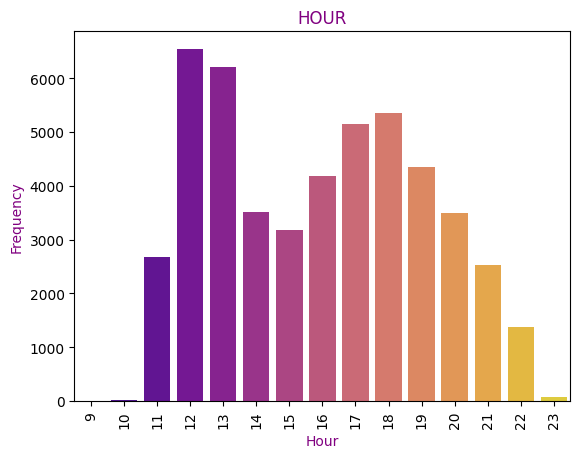

In [ ]:
sns.countplot(data=df,x="hour",palette="plasma")
plt.xticks(rotation=90)
plt.xlabel("Hour",fontsize=10,color="purple")
plt.ylabel("Frequency",fontsize=10,color="purple")
plt.title("HOUR",color="purple")
plt.show()

In [ ]:
#create Dayname column
df['dayname'] = df['order_date'].dt.day_name()
df['dayname']



,dayname
0,Thursday
1,Thursday
2,Thursday
3,Thursday
4,Thursday
...,...
48615,Thursday
48616,Thursday
48617,Thursday
48618,Thursday


In [ ]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     48620 non-null  int64         
 1   order_date   48620 non-null  datetime64[ns]
 2   order_time   48620 non-null  datetime64[ns]
 3   pizza_id     48620 non-null  object        
 4   quantity     48620 non-null  int64         
 5   unit_price   48620 non-null  float64       
 6   total_price  48620 non-null  float64       
 7   name         48620 non-null  object        
 8   category     48620 non-null  object        
 9   ingredients  48620 non-null  object        
 10  hour         48620 non-null  int32         
 11  dayname      48620 non-null  object        
dtypes: datetime64[ns](2), float64(2), int32(1), int64(2), object(5)
memory usage: 4.3+ MB


In [ ]:
df3 = df['dayname'].value_counts()
df3

,count
dayname,
Friday,8106
Saturday,7355
Thursday,7323
Wednesday,6797
Tuesday,6753
Monday,6369
Sunday,5917


<ipython-input-55-f2ad4c8e5af9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="dayname",palette="viridis")


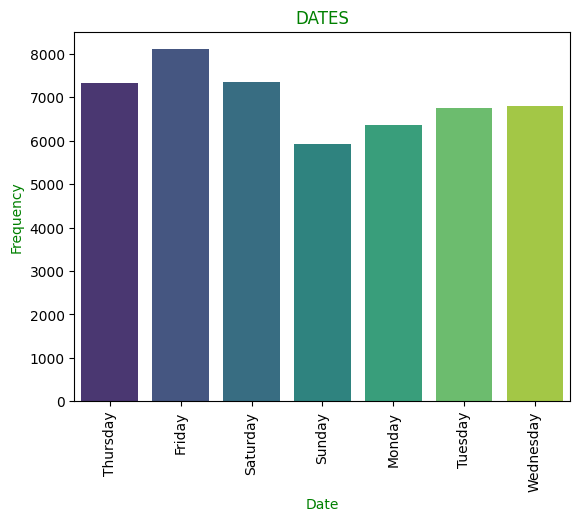

In [ ]:
sns.countplot(data=df,x="dayname",palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Date",fontsize=10,color="green")
plt.ylabel("Frequency",fontsize=10,color="green")
plt.title("DATES",color="green")
plt.show()